In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [20]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [21]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [22]:
test.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,64,209,55,135,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,59,159,47,83,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,71,75,173,43,99,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,81,61,203,59,116,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,78,79,177,59,87,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [23]:
train.value_counts('cardiovascular_history')

cardiovascular_history
0    678773
1     21227
Name: count, dtype: int64

In [24]:
train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


### Visualize Continuous Distributions

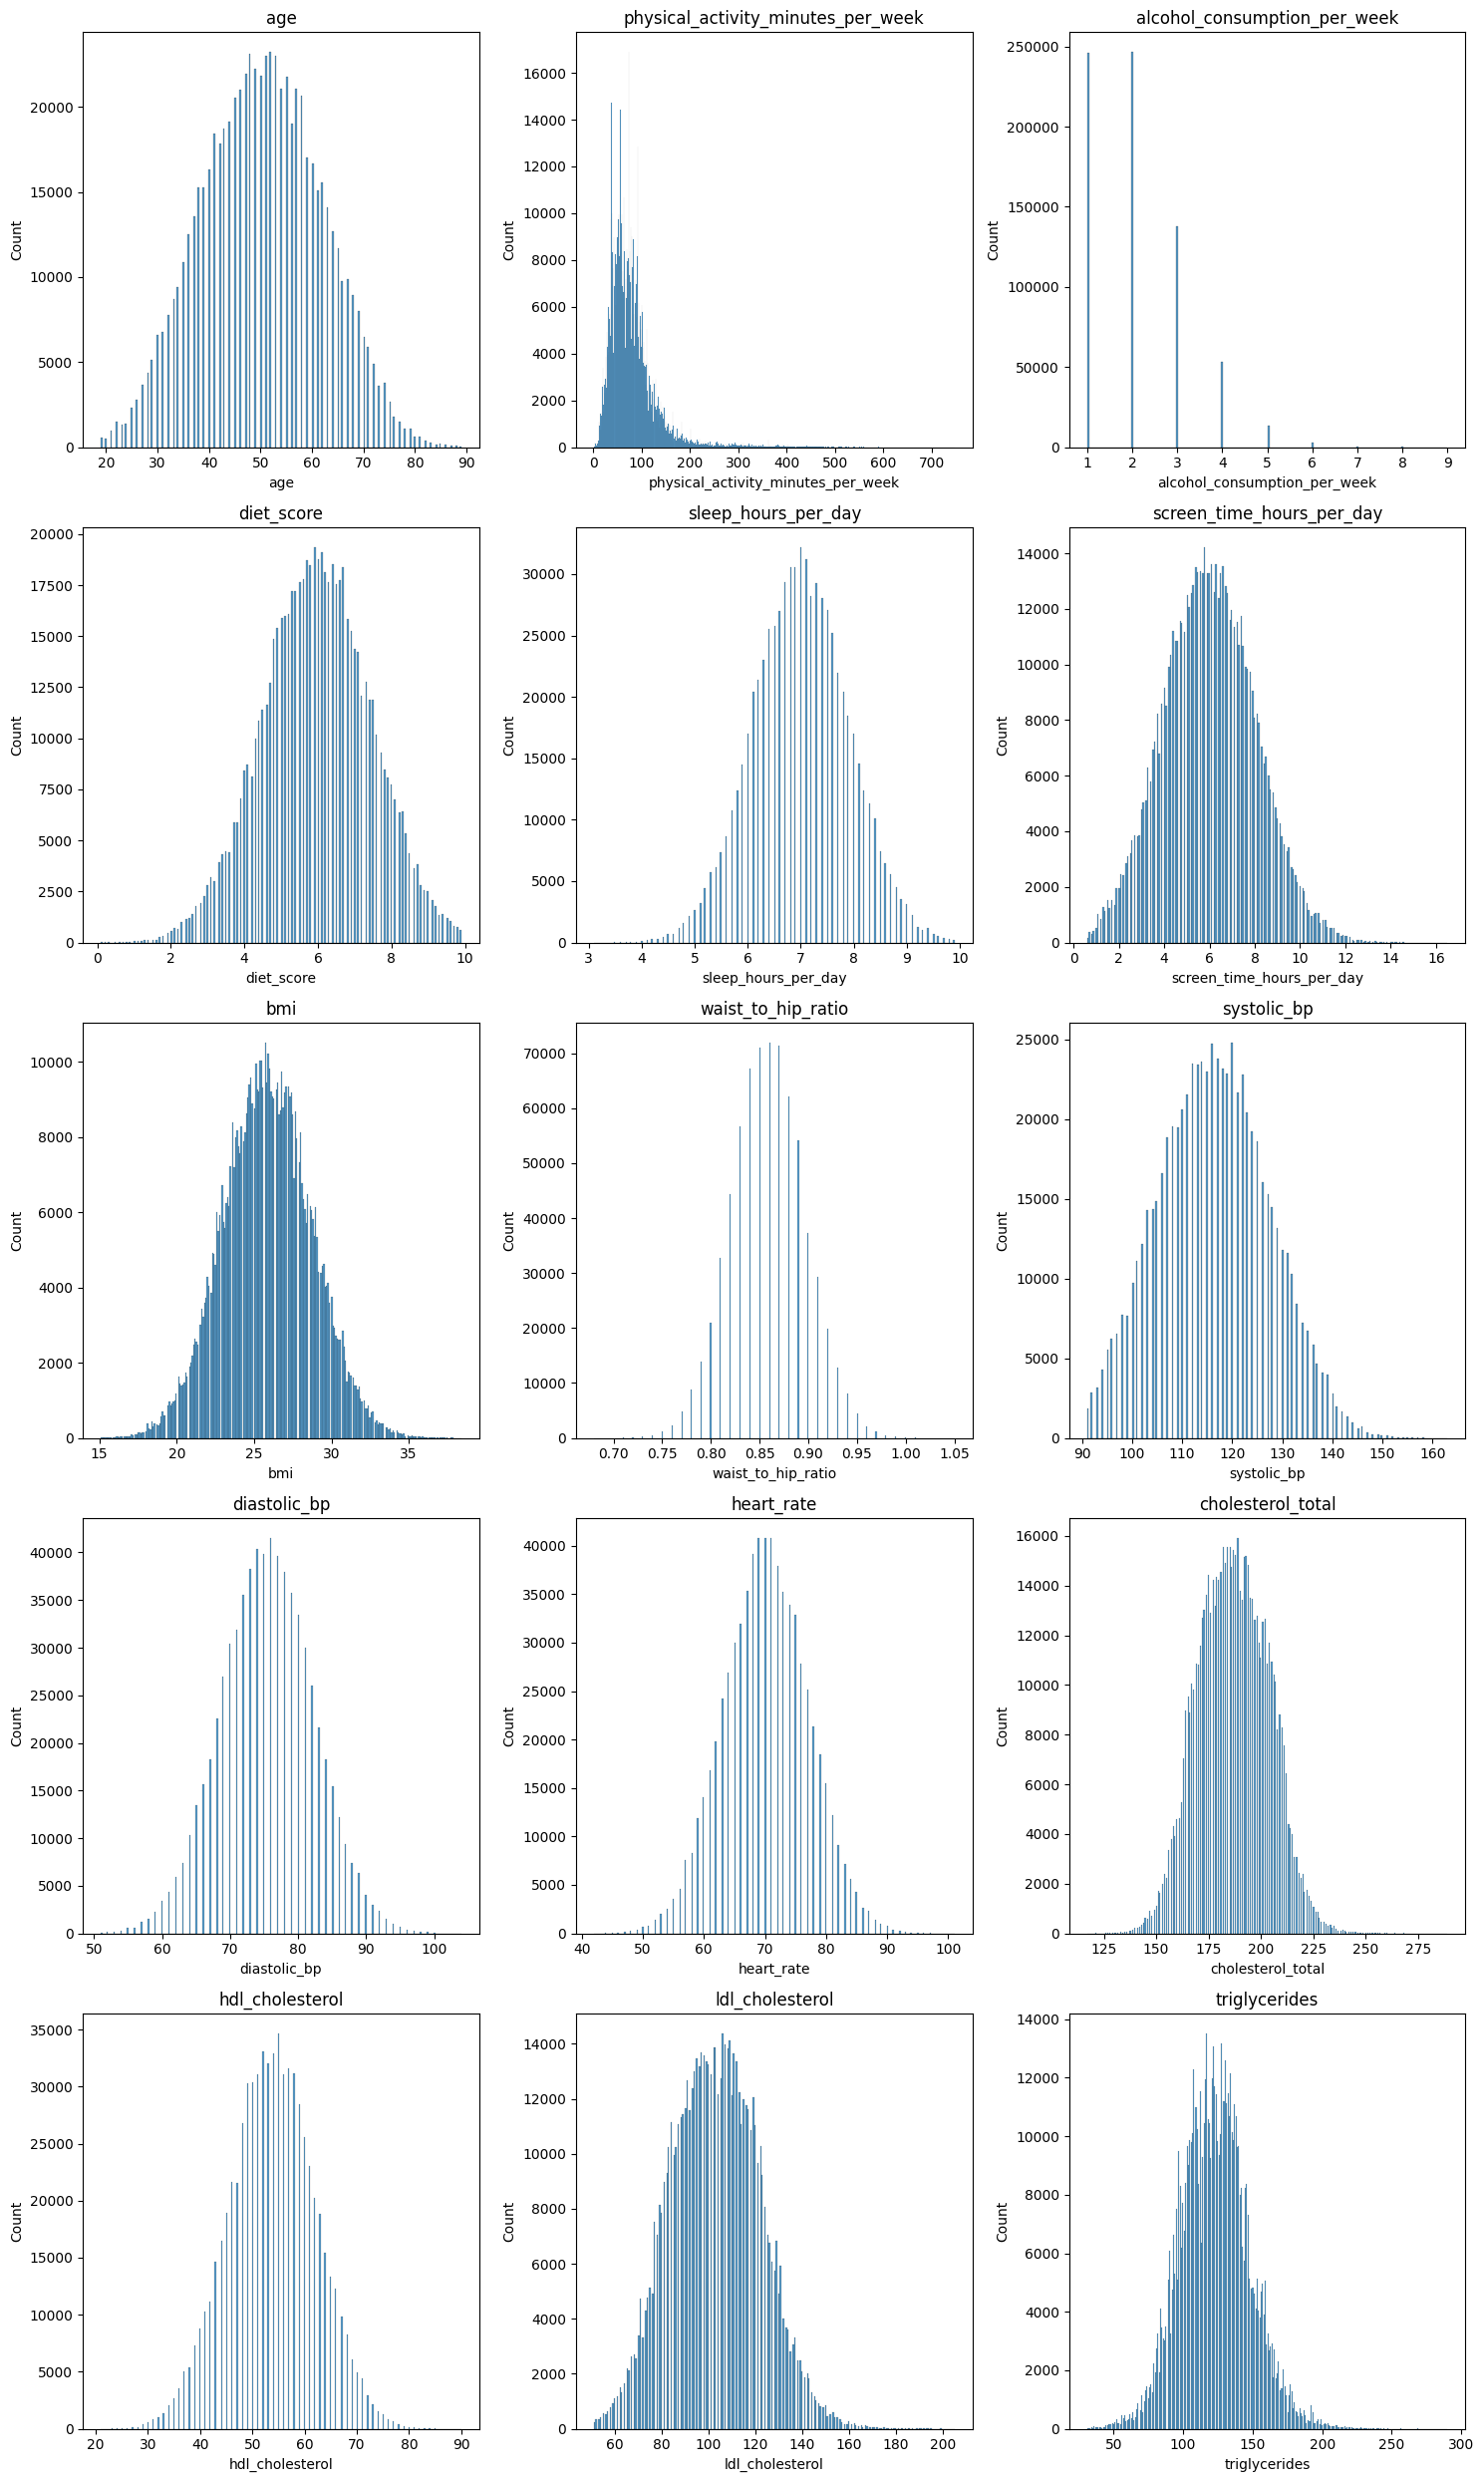

In [25]:
# Columns you want to plot
cols_to_plot = [
    "age",
    "physical_activity_minutes_per_week",
    "alcohol_consumption_per_week",
    "diet_score",
    "sleep_hours_per_day",
    "screen_time_hours_per_day",
    "bmi",
    "waist_to_hip_ratio",
    "systolic_bp",
    "diastolic_bp",
    "heart_rate",
    "cholesterol_total",
    "hdl_cholesterol",
    "ldl_cholesterol",
    "triglycerides"
]

# Filter only the columns that exist in train
cols_to_plot = [col for col in cols_to_plot if col in train.columns]

# Determine grid size
n_cols = 3  # number of plot columns you want
n_plots = len(cols_to_plot)
n_rows = math.ceil(n_plots / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through selected columns
for i, col in enumerate(cols_to_plot):
    sns.histplot(train[col], ax=axes[i], kde=False)
    axes[i].set_title(col)

# Hide extra subplots if grid is larger than needed
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Visualize Discrete Distributions (0/1)

/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_81077/4010351319.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No (0)", "Yes (1)"])
/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_81077/4010351319.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No (0)", "Yes (1)"])
/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_81077/4010351319.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No (0)", "Yes (1)"])
/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_81077/4010351319.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i]

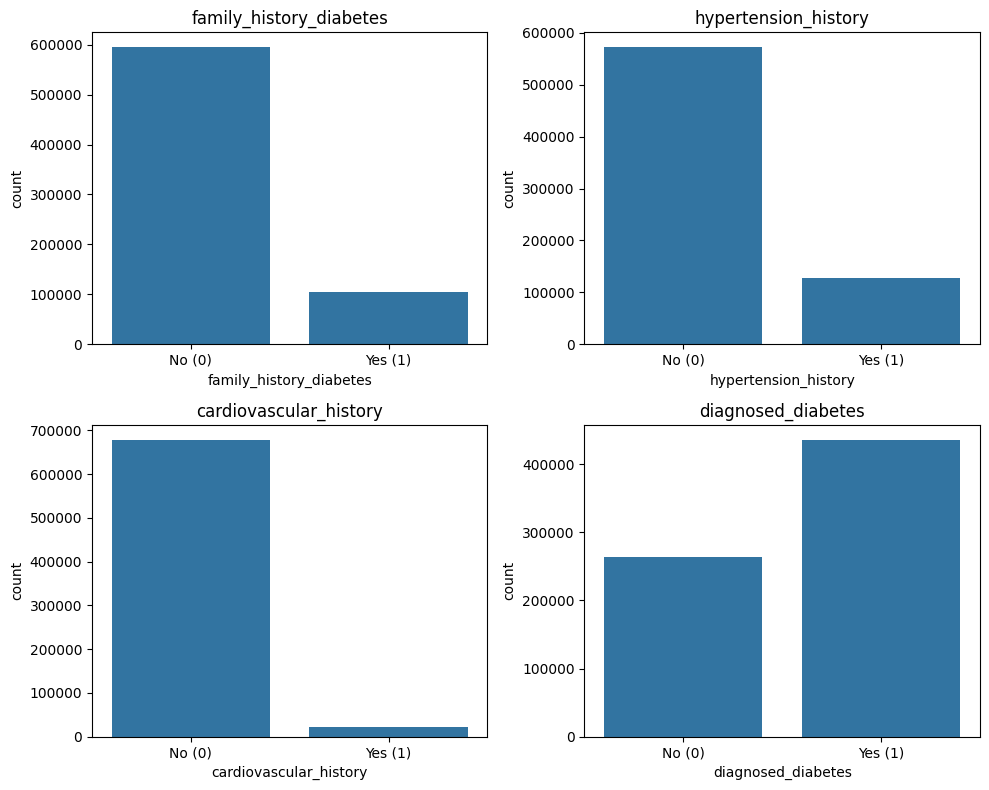

In [26]:
binary_cols = [
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history",
    "diagnosed_diabetes"
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    sns.countplot(data=train, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(["No (0)", "Yes (1)"])

plt.tight_layout()
plt.show()


### Visualize Categorical Distributions

In [ ]:
cat_cols = [
    'gender', 'ethnicity', 'education_level',
    'income_level', 'smoking_status', 'employment_status'
]

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(train[col].value_counts())


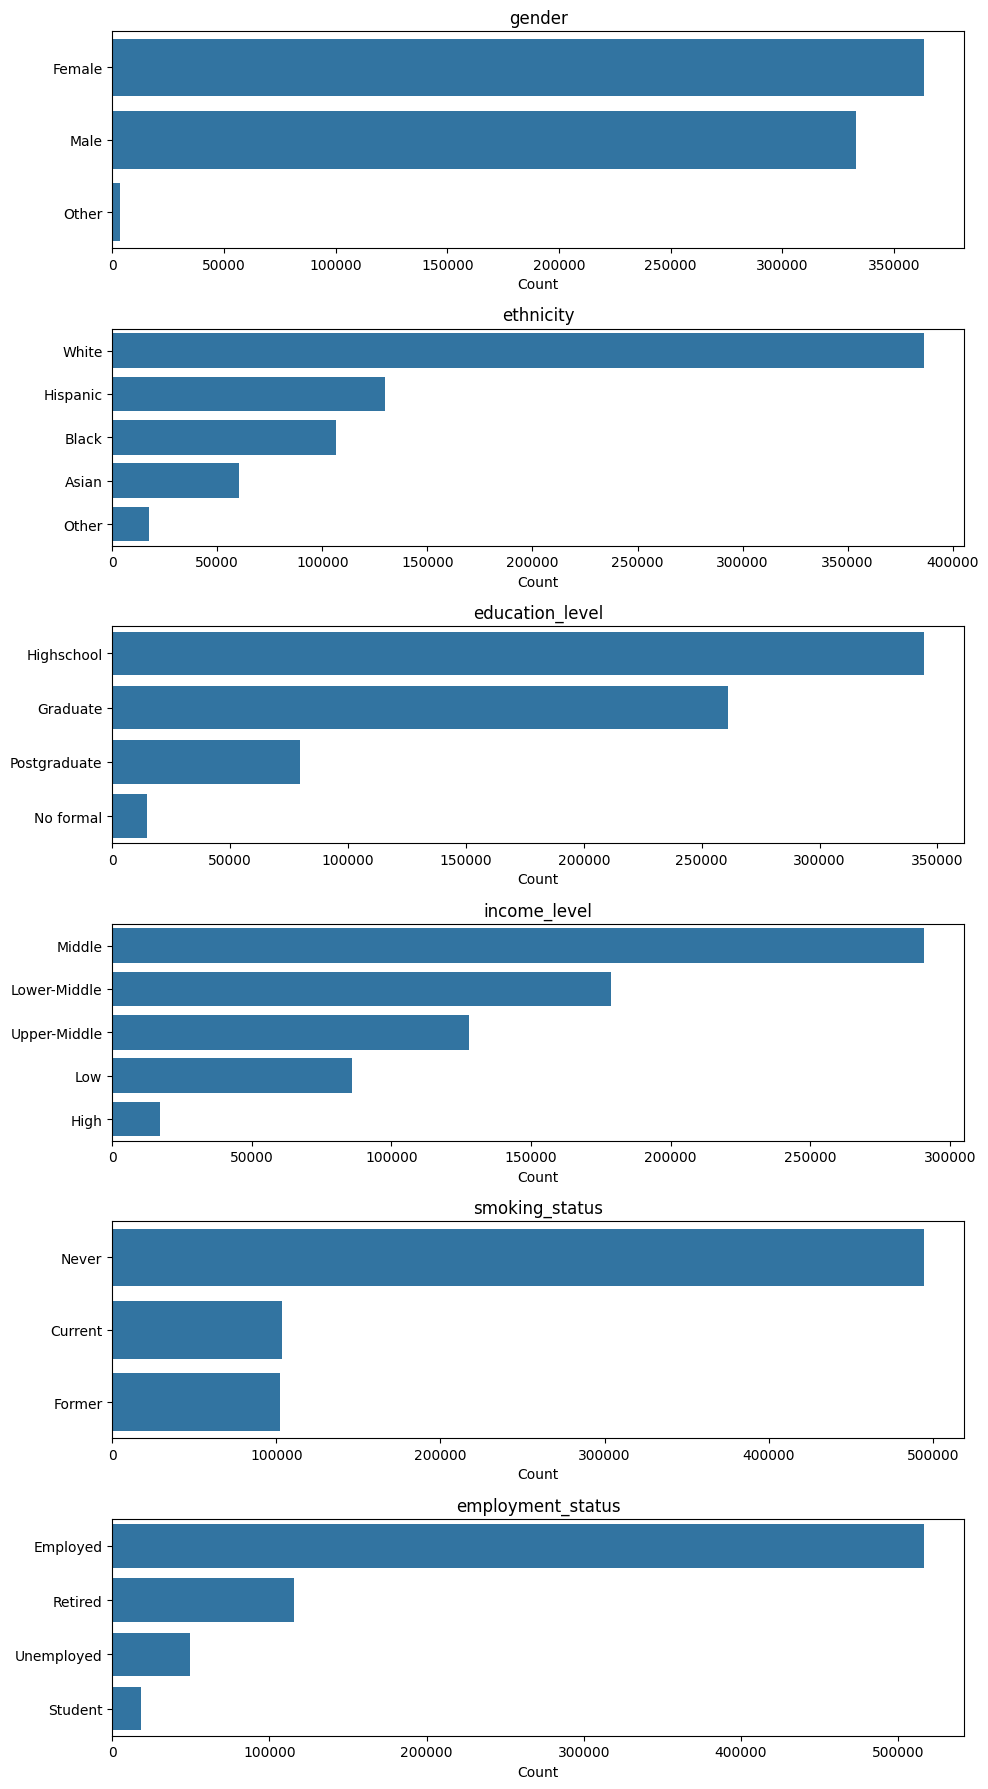

In [32]:
cat_cols = [
    'gender', 'ethnicity', 'education_level',
    'income_level', 'smoking_status', 'employment_status'
]

fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 18))

for i, col in enumerate(cat_cols):
    sns.countplot(
        data=train,
        y=col,                # horizontal bars
        order=train[col].value_counts().index,
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()